In [2]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [51]:
ENTRENAMIENTO_DIR = "C:/Users/XPC/Desktop/horse-or-human/train"
PRUEBAS_DIR = "C:/Users/XPC/Desktop/horse-or-human/validation"

SIZE = 150

# configuracion de entrenamiento
entrenamiento_datagen = ImageDataGenerator(rescale = 1./255)

# generador
generador_entrenamiento = entrenamiento_datagen.flow_from_directory(
    ENTRENAMIENTO_DIR,
    target_size=(SIZE,SIZE),
    batch_size=128,
    class_mode='binary'
)

# configuacion de pruebas (test set)
pruebas_datagen = ImageDataGenerator(rescale=1./255)

# generador
generator_pruebas = pruebas_datagen.flow_from_directory(
        PRUEBAS_DIR,
        target_size=(SIZE, SIZE),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [56]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image SIZExSIZE with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(SIZE, SIZE, 3)),
    tf.keras.layers.SpatialDropout2D(0.5),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.SpatialDropout2D(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.SpatialDropout2D(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.SpatialDropout2D(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.SpatialDropout2D(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
spatial_dropout2d_3 (Spatial (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 34, 34, 64)      

In [57]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(
    generador_entrenamiento,
    steps_per_epoch=20,  
    epochs=15,
    verbose=1,
    validation_data=generator_pruebas,
    validation_steps=20
)

Epoch 1/15
20/20 [==============================] - 8s 380ms/step - loss: 0.6939 - acc: 0.5666 - val_loss: 0.6423 - val_acc: 0.8203
Epoch 2/15
20/20 [==============================] - 8s 376ms/step - loss: 0.4476 - acc: 0.8127 - val_loss: 0.6452 - val_acc: 0.7984
Epoch 3/15
20/20 [==============================] - 7s 358ms/step - loss: 0.2774 - acc: 0.8861 - val_loss: 0.5840 - val_acc: 0.8562
Epoch 4/15
20/20 [==============================] - 7s 352ms/step - loss: 0.2952 - acc: 0.8906 - val_loss: 0.5718 - val_acc: 0.8109
Epoch 5/15
20/20 [==============================] - 8s 393ms/step - loss: 0.2517 - acc: 0.9152 - val_loss: 0.7318 - val_acc: 0.8141
Epoch 6/15
20/20 [==============================] - 7s 348ms/step - loss: 0.2383 - acc: 0.9227 - val_loss: 0.6776 - val_acc: 0.8172
Epoch 7/15
20/20 [==============================] - 8s 385ms/step - loss: 0.2076 - acc: 0.9310 - val_loss: 0.9499 - val_acc: 0.7984
Epoch 8/15
20/20 [==============================] - 7s 351ms/step - loss: 0.

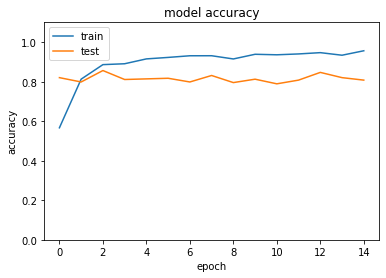

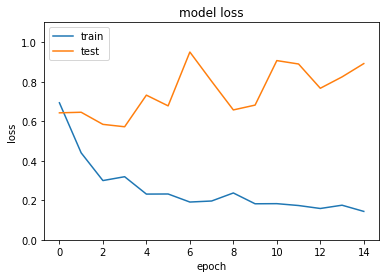

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

#https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%202%20-%20Notebook.ipynb#scrollTo=PLy3pthUS0D2

In [37]:
score = model.evaluate_generator (generator_pruebas,verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.5522472746670246
Test accuracy: 0.8359375
